## Project: McDonald's food menu
I decided to take the data set of McDonald's menu to make an analysis of food to find out what types of food are the most healthy, compare the quantity of nutriens and check what food consist more healty nutriens 

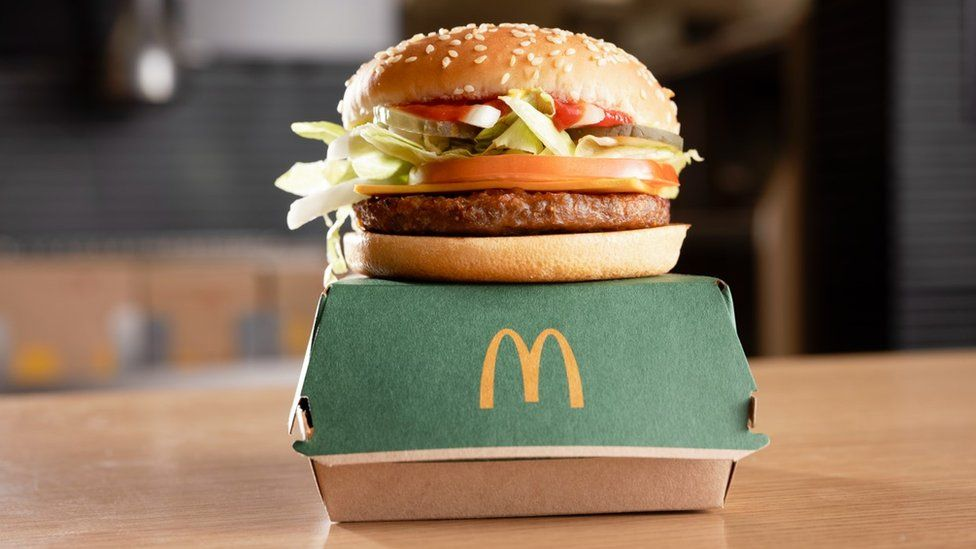

First of all we need to import some bibliotecs to work with data, make scatches and import a csv file itself

In [94]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import plotly as pl 
import plotly.express as px
import plotly.subplots
import plotly.graph_objects as go

menu = pd.read_csv("menu.csv")

## 1. Data overview

Let me print first 10 rows to show how is it built

In [95]:
menu.head(10)

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10
5,Breakfast,Steak & Egg McMuffin,6.5 oz (185 g),430,210,23.0,36,9.0,46,1.0,...,31,10,4,18,3,26,15,2,30,20
6,Breakfast,"Bacon, Egg & Cheese Biscuit (Regular Biscuit)",5.3 oz (150 g),460,230,26.0,40,13.0,65,0.0,...,38,13,2,7,3,19,10,8,15,15
7,Breakfast,"Bacon, Egg & Cheese Biscuit (Large Biscuit)",5.8 oz (164 g),520,270,30.0,47,14.0,68,0.0,...,43,14,3,12,4,19,15,8,20,20
8,Breakfast,"Bacon, Egg & Cheese Biscuit with Egg Whites (R...",5.4 oz (153 g),410,180,20.0,32,11.0,56,0.0,...,36,12,2,7,3,20,2,8,15,10
9,Breakfast,"Bacon, Egg & Cheese Biscuit with Egg Whites (L...",5.9 oz (167 g),470,220,25.0,38,12.0,59,0.0,...,42,14,3,12,4,20,6,8,15,15



We can't see all columns, so let me show all of them 

In [96]:
menu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Category                       260 non-null    object 
 1   Item                           260 non-null    object 
 2   Serving Size                   260 non-null    object 
 3   Calories                       260 non-null    int64  
 4   Calories from Fat              260 non-null    int64  
 5   Total Fat                      260 non-null    float64
 6   Total Fat (% Daily Value)      260 non-null    int64  
 7   Saturated Fat                  260 non-null    float64
 8   Saturated Fat (% Daily Value)  260 non-null    int64  
 9   Trans Fat                      260 non-null    float64
 10  Cholesterol                    260 non-null    int64  
 11  Cholesterol (% Daily Value)    260 non-null    int64  
 12  Sodium                         260 non-null    int

As we can see, dataset consists of 23 columns and 260 rows - positions in our menu

I do not need the columns "% Daily value" of Total Fat, Cholesterol, Sodium, Carbohydrates and Dietary Fiber, because I want to work with absolute values. So let's deleate them

In [97]:
menu = menu.drop(columns = ['Dietary Fiber (% Daily Value)',
                            'Cholesterol (% Daily Value)', 
                            'Sodium (% Daily Value)', 
                            'Carbohydrates (% Daily Value)', 
                            'Total Fat (% Daily Value)', 
                            'Saturated Fat (% Daily Value)'],
                 axis = 1)

## 2. Data cleanup.
As we can see, my DataSet does not have NaN cells, but there is one thing to do.
I will need Serving Size to be a number. Now it looks like "X oz (Y g)". Lets take only X value and replace the column with it

In [98]:
#some columns needed to work
cal = menu['Calories']
cat = set(menu['Category'])


#here I take only the first part of each Size cell
ooo = menu['Serving Size'].apply(lambda full_name: full_name.split()[0])
menu['Serving Size'] = ooo
menu.head(5)

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Saturated Fat,Trans Fat,Cholesterol,Sodium,Carbohydrates,Dietary Fiber,Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8,300,120,13.0,5.0,0.0,260,750,31,4,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8,250,70,8.0,3.0,0.0,25,770,30,4,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9,370,200,23.0,8.0,0.0,45,780,29,4,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7,450,250,28.0,10.0,0.0,285,860,30,4,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7,400,210,23.0,8.0,0.0,50,880,30,4,2,21,6,0,25,10


Perfect.


Also, I will need the ratio of the Calories to the Total Fat of Item. Let's create new column with values, equal to the Calory value, devided by the Total Fat Value

In [117]:
menu['Calory / Size'] = menu['Calories'] / menu['Total Fat']
menu.head(5)

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Saturated Fat,Trans Fat,Cholesterol,Sodium,Carbohydrates,Dietary Fiber,Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value),Calory / Size
0,Breakfast,Egg McMuffin,4.8,300,120,13.0,5.0,0.0,260,750,31,4,3,17,10,0,25,15,23.076923
1,Breakfast,Egg White Delight,4.8,250,70,8.0,3.0,0.0,25,770,30,4,3,18,6,0,25,8,31.250000
2,Breakfast,Sausage McMuffin,3.9,370,200,23.0,8.0,0.0,45,780,29,4,2,14,8,0,25,10,16.086957
3,Breakfast,Sausage McMuffin with Egg,5.7,450,250,28.0,10.0,0.0,285,860,30,4,2,21,15,0,30,15,16.071429
4,Breakfast,Sausage McMuffin with Egg Whites,5.7,400,210,23.0,8.0,0.0,50,880,30,4,2,21,6,0,25,10,17.391304


### What categories of menu do I have?

In [99]:
menu['Category'].value_counts()

Coffee & Tea          95
Breakfast             42
Smoothies & Shakes    28
Chicken & Fish        27
Beverages             27
Beef & Pork           15
Snacks & Sides        13
Desserts               7
Salads                 6
Name: Category, dtype: int64

Lets represent them in the form of a piechart

In [100]:
ca = menu['Category'].value_counts()
cat2 = ['Coffee & Tea', 'Breakfast', 'Smoothies & Shakes', 'Chicken & Fish', 'Beverages', 'Beef & Pork', 'Snacks & Sides', 'Desserts', 'Salads']
px.pie(ca, values = 'Category', names = cat2, title = 'Categories of food')


## 3. Questions, hypotesis, comarisons
### Question 1: What Categories are the most Caloristical?

Let's represent the calories of each item in the line graph. Differemt colors will show different categories, respectively to the piechart right above

In [102]:
cat3 = menu['Category']
px.line(menu, x = 'Item', y = 'Calories', color = cat3, title = 'Calories')

Now let's make a mini-research to find out what categories are more caloristical in avarage, wrt. the portion size

In [103]:
cal_dic = {'Beef & Pork': [], 'Coffee & Tea': [], 'Beverages': [], 'Desserts': [], 'Smoothies & Shakes': [], 'Chicken & Fish': [], 'Snacks & Sides': [], 'Salads': [], 'Breakfast': []}
for el in cat:
    s = 0
    i = 0
    s2 = menu[menu['Category'] == el]['Calories'].mean()
    for x in menu[menu['Category'] == el]['Serving Size']:
        x = float(x)
        s += x
        i += 1
    cal_dic[el].append(s2/(s/i))

#let's sort dic and print it
dic = dict(sorted(cal_dic.items(), key=lambda item: item[1]))
arr_cal = list(dic)
for el in dic:
    print(round(*dic[el]), el)

7 Beverages
16 Coffee & Tea
28 Salads
35 Smoothies & Shakes
63 Desserts
64 Chicken & Fish
65 Snacks & Sides
72 Beef & Pork
74 Breakfast


As we can see for the meet, Beef & Pork are much more caloristical in avarage, than Chicken & Fish.
But breakfast items that include different types of dishes are the most caloristical here
Snacks take a plase right between two types of meet
To sum up, Salads and Chicken are the best categories for diet with 28.125 and 64.5 calories/oz respectively

### Question 2: What Category from Beef & Pork and Chicken & Fish are rich in nutrients?
Now I want to compare the nutriens of Beef & Pork with Chicken & Fish

In [10]:
#something for nutriens
beef = menu[menu['Category'] == 'Beef & Pork'] 
chicken = menu[menu['Category'] == 'Chicken & Fish'] 
dic_col = {'Total Fat': [], 'Saturated Fat': [], 'Trans Fat': [], 'Cholesterol': [], 'Carbohydrates': [], 'Dietary Fiber': [], 'Sugars': [], 'Protein': []}
col = ['Total Fat', 'Saturated Fat', 'Trans Fat', 'Cholesterol', 'Carbohydrates', 'Dietary Fiber', 'Sugars', 'Protein', 'Vitamin A (% Daily Value)', 'Vitamin C (% Daily Value)', 'Iron (% Daily Value)', 'Calcium (% Daily Value)']
col_val_beef = []
col_val_chi = []
for el in col:
    col_val_beef.append(beef[el].mean())
    col_val_chi.append(chicken[el].mean())

Here is the destribution of nureiens in Beef & Pork category

In [44]:
px.pie(values = col_val_beef, names = col, title = 'Destribution of nutrients in Beef & Pork')

Chicken & Fish category as well

In [43]:
px.pie(values = col_val_chi, names = col, title = 'Destribution of nutrients in Chicken & Fish')

To see the difference, I will show the quantity of each nutrient right next to each other.

In [78]:
fig1 = go.Figure(data=[
    go.Bar(name='Beef & Pork', x = col, y=col_val_beef),
    go.Bar(name='Chicken & Fish', x = col, y=col_val_chi)],
    layout=go.Layout(title=go.layout.Title(text='Nutrients comparison for Beef & Pork and Chicken & Fish'))
               )
fig1.update_xaxes(title = 'Nutrients')
fig1.update_yaxes(title = 'Quantity')
fig1

As we can see, in avarage, Beef & Pork consist of more nutriens, but, as for useful nutriens (4 right bars), 
there are more Iron & Calcium in Beef, but less Vitamins A & C

### Question 3: What is the most healthy food? 
Lets compare by 4 healthy nutrients: Vitamins A and C, Calcium, Iron. I will take top 20 positions by the % of Daily Value of nutrient

In [105]:
px.bar(p1[0:20], x = 'Item', y = 'Calcium (% Daily Value)', title = 'Calcium %')

In [106]:
px.bar(p2[0:20], x = 'Item', y = 'Iron (% Daily Value)', title = 'Iron %')

In [107]:
px.bar(p3[0:20], x = 'Item', y = 'Vitamin C (% Daily Value)', title = 'Vitamin C %')

In [108]:
px.bar(p4[0:20], x = 'Item', y = 'Vitamin A (% Daily Value)', title = 'Vitamin A %')


As we can see, Calcium mainly consists at Smoothie & Shakes

Iron: Breakfasts with eggs & Meat

Vitamin C: Orange Juice & Breakfast fruits

Vitamin A: Salads

This is really healthy Mc'Donalds food!

### Hypotesis: Protein, Sugars and Carbohydrates correlate with each other
To see the actual correlation, lets produce the quantity of these nutrients by three axises for each Item in menu. Different colors will show the different categories

In [85]:
px.scatter_3d(menu, x = 'Sugars', y  = 'Carbohydrates', z = 'Protein', color = 'Category')

We get a very beautiful line, that means, that all of these three nutrients strongly correlates with each other. That's acually that we wanted to see!